In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

import six
import sys
sys.modules['sklearn.externals.six'] = six

from IPython.display import Image
import six
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


In [68]:
file_path = '/Users/harshsharma/Desktop/ai-engineer-roadmap-2024/ML Models/Decision Trees/heart_v2.csv'

In [69]:
heart_d = pd.read_csv(file_path)

In [4]:
X = heart_d.drop('heart disease', axis = 1)
y = heart_d['heart disease']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [6]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                    feature_names=X.columns,
                    class_names=['No Disease', 'Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    return graph

In [7]:
def evaulate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train set performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*50)
    print("Test set performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

### Using Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [11]:
# n_estimators is the number of trees we want
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10)

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [13]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [14]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [15]:
sample_tree = rf.estimators_[4]

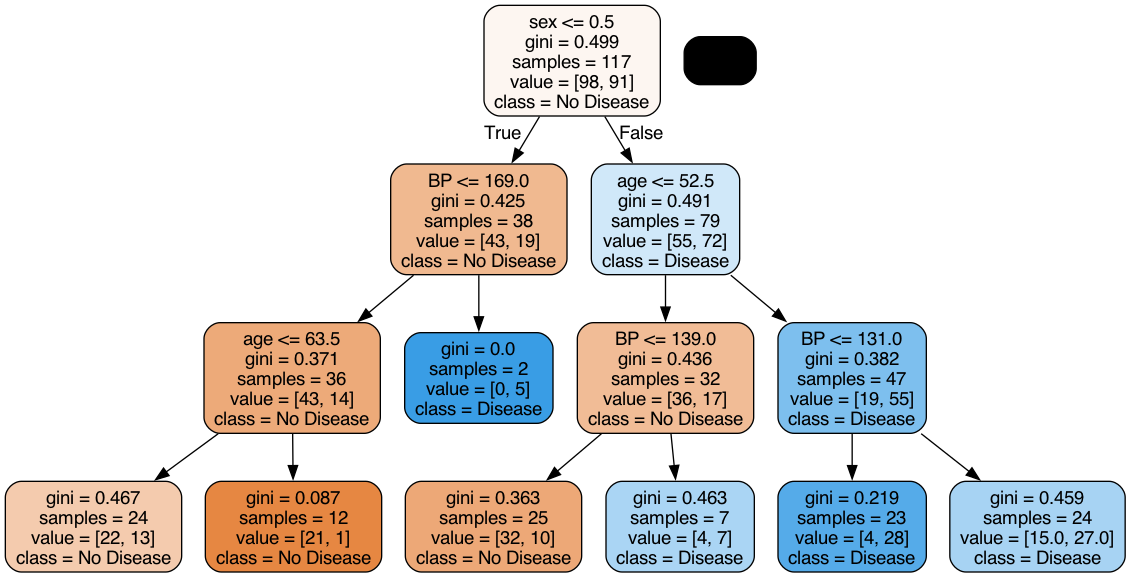

In [18]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [44]:
evaulate_model(sample_tree)

Train set performance
0.656084656084656
[[62 39]
 [26 62]]
--------------------------------------------------
Test set performance
0.5925925925925926
[[30 19]
 [14 18]]


#### OOB Score

In [19]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [23]:
rf.oob_score_

0.6349206349206349

#### Grid search for hyper-parameter tuning

In [59]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [60]:
params = {
    'max_depth': [1,2,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'max_features': [2,3,4,5],
    'n_estimators': [10,30,50,100,150]
}

In [61]:
#cv = 4, 4 cross validations
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [62]:
%%time
grid_search.fit(X, y)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


CPU times: user 464 ms, sys: 100 ms, total: 564 ms
Wall time: 21.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [63]:
rf_best = grid_search.best_estimator_

In [64]:
rf_best

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [65]:
evaulate_model(rf_best)

Train set performance
0.8253968253968254
[[88 13]
 [20 68]]
--------------------------------------------------
Test set performance
0.8271604938271605
[[44  5]
 [ 9 23]]


In [66]:
sample_tree = rf_best.estimators_[0]

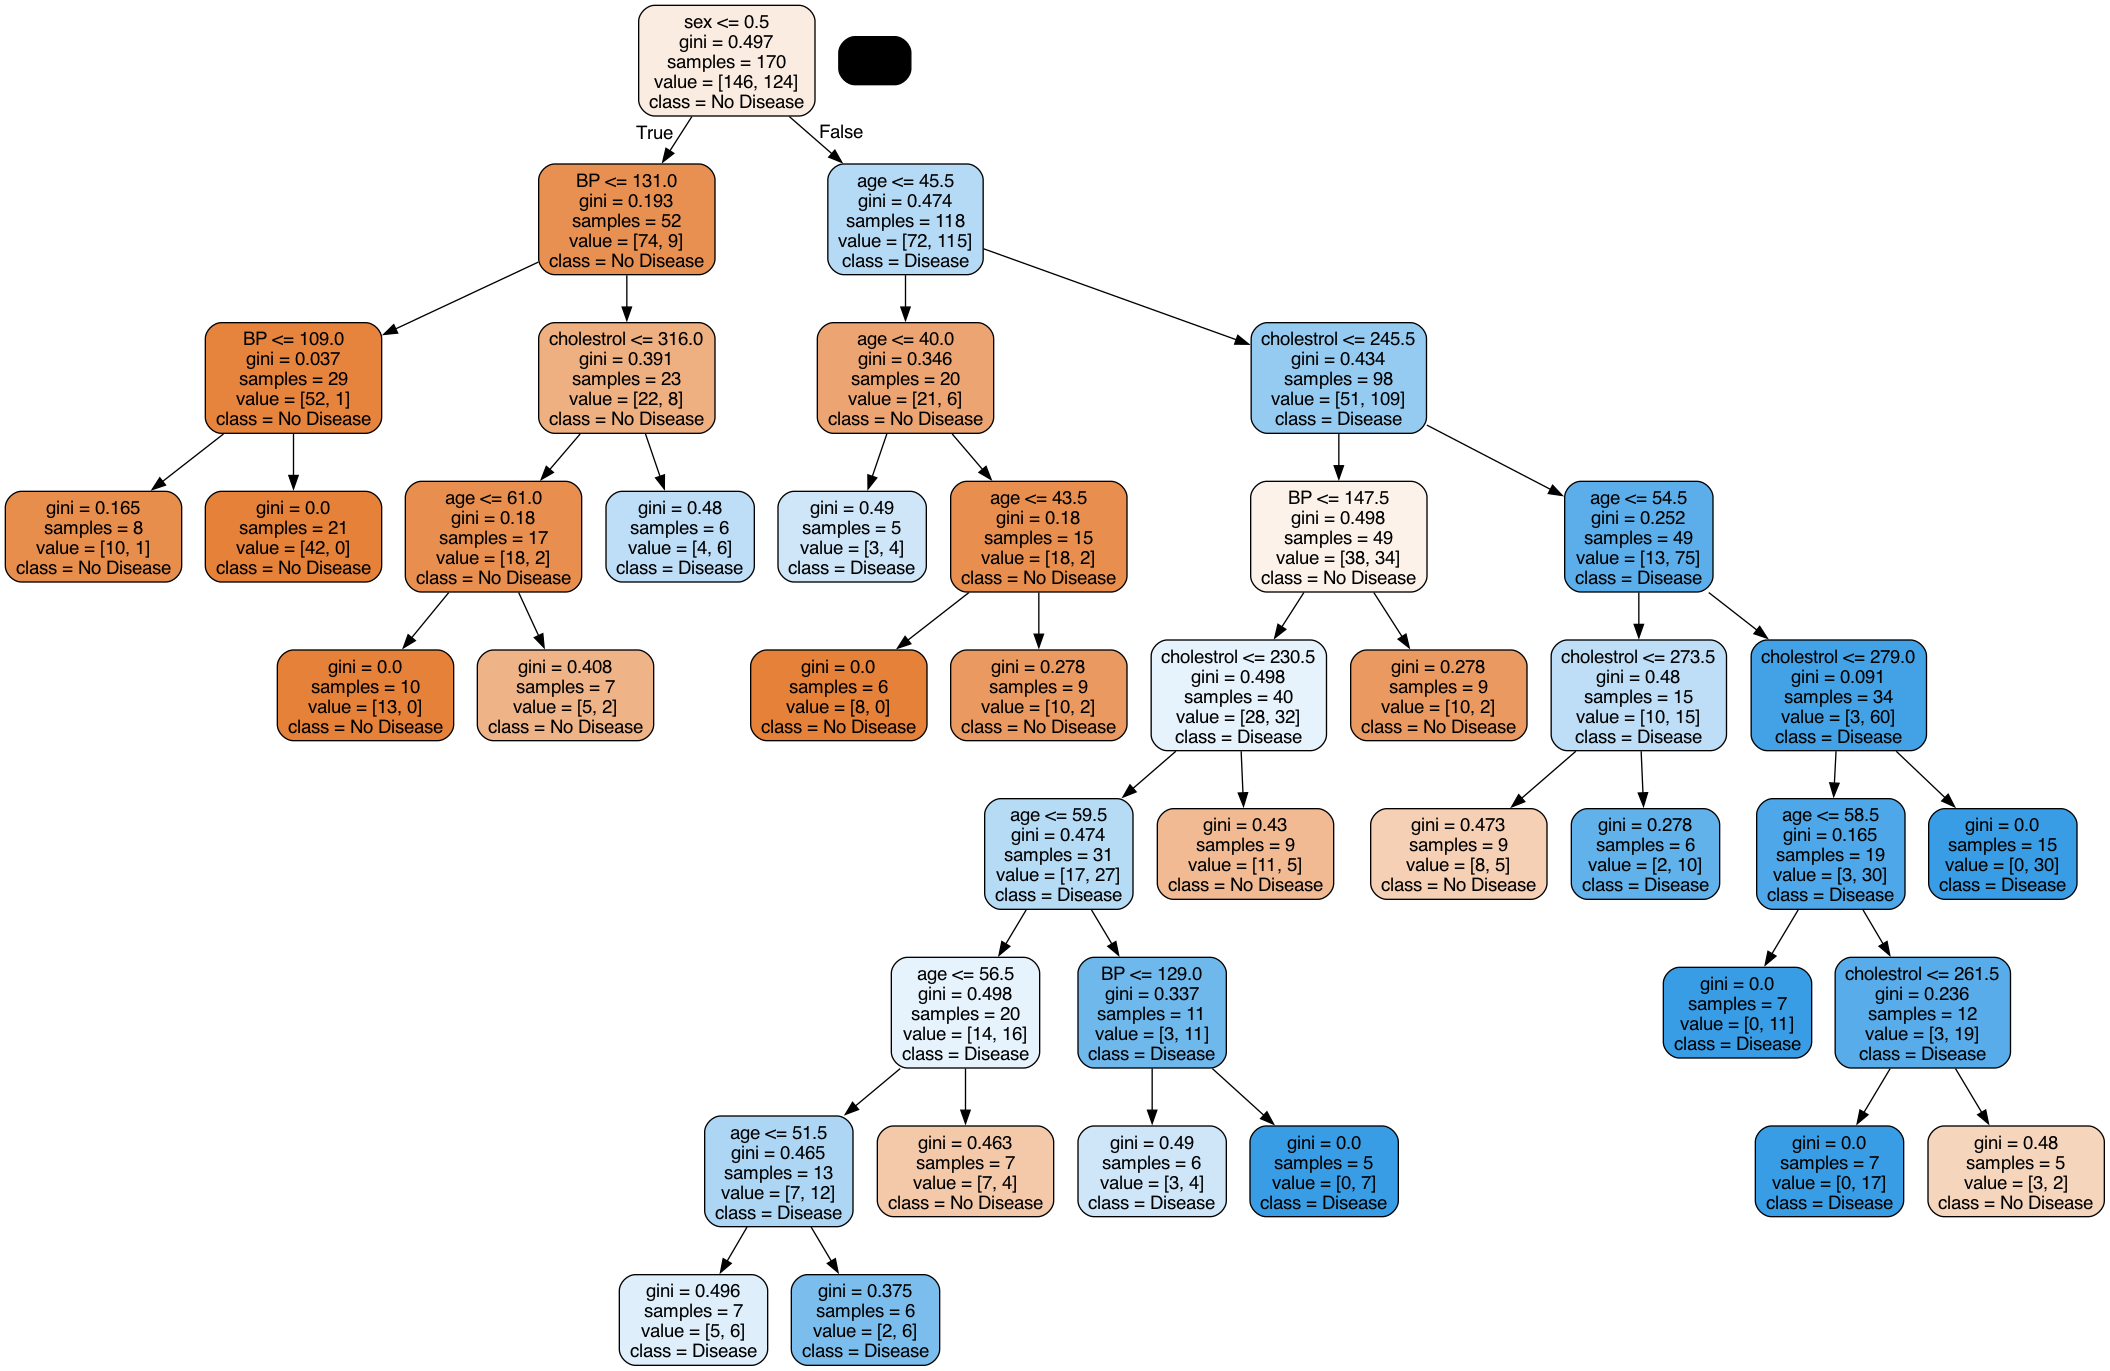

In [67]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [46]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [47]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [48]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [50]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [51]:
imp_df.sort_values(by='Imp', ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
